<a href="https://colab.research.google.com/github/insoucyant/Learn_Python/blob/master/LeetCodeSTACK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

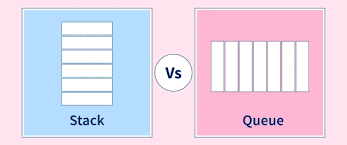

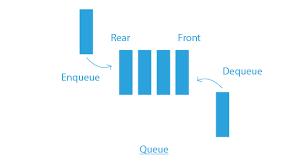

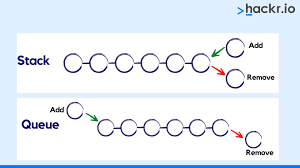

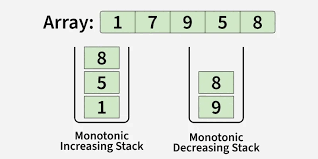

| Problem # | Problem Name | Difficulty | Tags | Key Concept / Notes |
|----------|-----------------------------|------------|-------------------------------|---------------------------------------------|
| 20       | Valid Parentheses           | Easy       | Stack / Basic                 | Matching parentheses / Balanced brackets |
| 71       | Simplify Path               | Medium     | Stack / Basic                 | Directory path simplification using stack (handling “..”, “.” etc.) |
| 155      | Min Stack                   | Medium     | Stack / Design                | Design stack with O(1) getMin / min-element retrieval |
| 150      | Evaluate Reverse Polish Notation | Medium  | Stack / Expression           | Evaluate postfix (RPN) expressions via stack |
| 224      | Basic Calculator            | Hard       | Stack / Expression            | Evaluate infix expression with parentheses using stack |
| 227      | Basic Calculator II         | Medium     | Stack / Expression            | Evaluate arithmetic expression (no parentheses) using stack parsing |
| 232      | Implement Queue using Stacks | Easy      | Stack / Design                | Use two stacks to simulate queue behavior |
| 225      | Implement Stack using Queues | Easy      | Stack / Design                | Use queues to simulate stack behavior |
| 1047     | Remove All Adjacent Duplicates In String | Easy | Stack / String             | Use stack to eliminate adjacent duplicates in string |
| 496      | Next Greater Element I      | Easy       | Monotonic Stack / Array       | Find next greater element for each item (right side) |
| 503      | Next Greater Element II     | Medium     | Monotonic Stack / Array       | Circular-array variant of next greater element |
| 739      | Daily Temperatures          | Medium     | Monotonic Stack / Array       | For each day, find how many days until a warmer day — “next greater” pattern |
| 901      | Online Stock Span           | Medium     | Monotonic Stack / Array / Stream | Compute span of stock price days (previous greater / span pattern) |
| 42       | Trapping Rain Water         | Hard       | Monotonic Stack / Two-pointer / Array | Histogram / rain-water trapping using stack or two-pointer |
| 84       | Largest Rectangle in Histogram | Hard    | Monotonic Stack / Array / Histogram | Compute largest rectangle under histogram in O(n) using stack |
| 85       | Maximal Rectangle           | Hard       | Monotonic Stack / Matrix / Histogram  | 2D variation — use histogram + stack per row to find max rectangle |
| 402      | Remove K Digits             | Medium     | Monotonic Stack / String / Greedy | Use constrained monotonic stack to form smallest possible number after removing k digits |
| 456      | 132 Pattern                 | Medium


# 20 Valid Parentheses
Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

Open brackets must be closed by the same type of brackets.
Open brackets must be closed in the correct order.
Every close bracket has a corresponding open bracket of the same type.



In [ ]:
def isValid(s):
  hashmap = {
      ')': '(',
      '}': '{',
      ']':'['
  }
  # In Python the easiest way to build a stack is to build an empty list.
  # We 'append'  when we want to put something on the top of the stack. Right is top. Left is bottom.
  # We use 'pop' when we want to remove something from the top of the stack. Pop removes the right most value.
  # We are appending to the right (top), we are removing from the right (top).
  # LIFO!
  stk = []

  for c in s:
    if c not in hashmap: # This is Open Bracket
      stk.append(c)
    else: # This is a closing bracket
      if not stk: # Nothing in the stack and yet we have a closing bracket so invalid
        return False
      else:
        popped = stk.pop() # LIFO
        if hashmap[c] != popped: # Not the corresponding opening closing
          return False
  return not stk # Stack should be empty with no dangling opening bracket left
s = "()"
print(isValid(s))
s = "()[]{}"
print(isValid(s))
s = "(]"
print(isValid(s))
s = "([])"
print(isValid(s))

True
True
False
True


# 682 Baseball Game
You are keeping the scores for a baseball game with strange rules. At the beginning of the game, you start with an empty record.

You are given a list of strings operations, where operations[i] is the ith operation you must apply to the record and is one of the following:

An integer x.
Record a new score of x.
'+'.
Record a new score that is the sum of the previous two scores.
'D'.
Record a new score that is the double of the previous score.
'C'.
Invalidate the previous score, removing it from the record.
Return the sum of all the scores on the record after applying all the operations.

The test cases are generated such that the answer and all intermediate calculations fit in a 32-bit integer and that all operations are valid.

In [ ]:
def calPoints(operations):
  stk = []
  for op in operations:
    if op == '+':
      stk.append(stk[-1] + stk[-2])
    elif op == 'D':
      stk.append(stk[-1]*2)
    elif op == 'C':
      stk.pop()
    else:
      stk.append(int(op))
  return sum(stk)

ops = ["5","2","C","D","+"]
print(calPoints(ops))
ops = ["1","C"]
print(calPoints(ops))

30
0


# 739 Daily Temperature
Given an array of integers temperatures represents the daily temperatures, return an array answer such that answer[i] is the number of days you have to wait after the ith day to get a warmer temperature. If there is no future day for which this is possible, keep answer[i] == 0 instead.

In [ ]:
def dailyTemperatures(temperatures):
  n = len(temperatures)
  result = [0]*n
  stk = []
  for i, t in enumerate(temperatures):
    while stk and t > stk[-1][0]:
      stk_t, stk_i = stk.pop()
      result[stk_i] = i - stk_i
    stk.append((t,i))
  return result
temperatures = [73,74,75,71,69,72,76,73]
print(dailyTemperatures(temperatures))
temperatures = [30,40,50,60]
print(dailyTemperatures(temperatures))
temperatures = [30,60,90]
print(dailyTemperatures(temperatures))

[1, 1, 4, 2, 1, 1, 0, 0]
[1, 1, 1, 0]
[1, 1, 0]


# 150 Reverse Polish Notation
You are given an array of strings tokens that represents an arithmetic expression in a Reverse Polish Notation.

Evaluate the expression. Return an integer that represents the value of the expression.

Note that:

* The valid operators are '+', '-', '*', and '/'.
* Each operand may be an integer or another expression.
* The division between two integers always truncates toward zero.
* There will not be any division by zero.
* The input represents a valid arithmetic expression in a reverse polish notation.
* The answer and all the intermediate calculations can be represented in a 32-bit integer.

In [ ]:
from math import ceil, floor
def evalRPN(tokens):
  stk = [] # Dynamic Array
  for t in tokens:
    if t in '+-*/':
      b,a = stk.pop(), stk.pop()
      if t == '+':
        stk.append(a+b)
      elif t == '-':
        stk.append(a-b)
      elif t == '*':
        stk.append(a*b)
      else:
        division = a/b
        if division < 0:
          stk.append(ceil(division))
        else:
          stk.append(floor(division))
    else:
      stk.append(int(t))

  return stk[0]

tokens = ["2","1","+","3","*"]
print(evalRPN(tokens))
tokens = ["4","13","5","/","+"]
print(evalRPN(tokens))
tokens = ["10","6","9","3","+","-11","*","/","*","17","+","5","+"]
print(evalRPN(tokens))


9
6
22


In [1]:
tokens = [2,3,4]
b,a = tokens.pop(), tokens.pop()
print(b,a)

4 3


# Sieve of Erastothenes

In [ ]:
from math import isqrt
def primes_less_than(n):
  if n <= 2:
    return []
  sieve = [True] * n
  sieve[0] = sieve[1] = False
  for i in range(2, isqrt(n)):
    if sieve[i]:
      for j in range(i*i, n, i):
        sieve[j] = False

  return [i for i in range(n) if sieve[i]]
print(primes_less_than(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


[5, 7, 9, 11, 11, 13, 13, 15, 17, 17, 17, 19, 19, 19, 21, 23, 23, 23, 25, 25, 25, 27, 29, 29, 29, 29, 31, 31, 31, 31, 33, 35, 35, 35, 37, 37, 37, 37, 37, 39, 41, 41, 41, 41, 41, 43, 43, 43, 43, 43, 45, 47, 47, 47, 47, 47, 49, 49, 49, 49, 49, 51, 53, 53, 53, 53, 53, 53, 55, 55, 55, 57, 59, 59, 59, 59, 59, 59, 61, 61, 61, 61, 61, 61, 63, 65, 65, 65, 67, 67, 67, 67, 67, 67, 67, 69, 71, 71, 71, 71, 71, 71, 71, 73, 73, 73, 73, 73, 73, 73, 75, 77, 77, 77, 77, 77, 79, 79, 79, 79, 79, 79, 79, 81, 83, 83, 83, 83, 83, 83, 83, 83, 85, 85, 85, 87, 89, 89, 89, 89, 89, 89, 89, 89, 91, 91, 91, 91, 91, 93, 95, 95, 95, 97, 97, 97, 97, 97, 97, 97, 97, 99]


3
5
7
9


81
90
99
